# FIFA Tweets Sentiment Analysis using Python & NLP

## Import Required Libraries

In [132]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load and Explore the Dataset

read the dataset and filtered it to focus only on tweets related to "FIFA".

In [135]:
df = pd.read_csv("twitter_training.csv")
df.head()

,Tweet ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [137]:
fifa_df = df[df["Entity"] =="FIFA"].copy()

## Data Cleaning

removed:
- Unused columns like `Sentiment`
- Rows with missing or null tweet text
- Duplicate tweets based on Tweet ID

In [140]:
fifa_df.drop(columns=["Sentiment"],inplace = True)

In [142]:
fifa_df.dropna(subset=["Text"],inplace = True)
fifa_df.drop_duplicates(inplace=True)

In [144]:
fifa_df.count()

Tweet ID    2238
Entity      2238
Text        2238
dtype: int64

In [146]:
fifa_df.head()

,Tweet ID,Entity,Text
48936,6001,FIFA,The fact that Andy Gray hates this so much mak...
48937,6001,FIFA,The fact that Andy Gray hates it so much makes...
48938,6001,FIFA,The fact that Andy Gray hates it so much makes...
48939,6001,FIFA,The fact that Andy himself hates this so much ...
48940,6001,FIFA,The fact that Andy Gray probably hates this so...


## Text Cleaning and Preprocessing

cleaned the tweet text by:
- Lowercasing
- Removing URLs, mentions, hashtags, numbers, and punctuation
- Removing extra spaces

In [149]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else :
        return ""
# apply cleaning
fifa_df["Cleaned_Text"] = fifa_df["Text"].apply(clean_text)
fifa_df[["Text", "Cleaned_Text"]].head()

,Text,Cleaned_Text
48936,The fact that Andy Gray hates this so much mak...,the fact that andy gray hates this so much mak...
48937,The fact that Andy Gray hates it so much makes...,the fact that andy gray hates it so much makes...
48938,The fact that Andy Gray hates it so much makes...,the fact that andy gray hates it so much makes...
48939,The fact that Andy himself hates this so much ...,the fact that andy himself hates this so much ...
48940,The fact that Andy Gray probably hates this so...,the fact that andy gray probably hates this so...


## Remove Stop Words

used NLTK to remove common stop words that don't carry useful meaning in sentiment analysis.

In [152]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)
fifa_df["Filtered_Text"] = fifa_df["Cleaned_Text"].apply(remove_stopwords)
fifa_df[["Text", "Cleaned_Text", "Filtered_Text"]].head()

,Text,Cleaned_Text,Filtered_Text
48936,The fact that Andy Gray hates this so much mak...,the fact that andy gray hates this so much mak...,fact andy gray hates much makes love idea even
48937,The fact that Andy Gray hates it so much makes...,the fact that andy gray hates it so much makes...,fact andy gray hates much makes love idea
48938,The fact that Andy Gray hates it so much makes...,the fact that andy gray hates it so much makes...,fact andy gray hates much makes love idea
48939,The fact that Andy himself hates this so much ...,the fact that andy himself hates this so much ...,fact andy hates much makes love idea even
48940,The fact that Andy Gray probably hates this so...,the fact that andy gray probably hates this so...,fact andy gray probably hates much makes love ...


## Sentiment Scoring with VADER

applied VADER (Valence Aware Dictionary and sEntiment Reasoner) to:
- Calculate sentiment score for each tweet
- Classify tweets into Positive, Negative, or Neutral


In [155]:
def get_sentiment_score(text) :
    return sia.polarity_scores(text)['compound']
fifa_df["Sentiment_Score"] = fifa_df["Filtered_Text"].apply(get_sentiment_score)

In [156]:
def classify_sentiment(score) :
    if score >= 0.05 :
        return "Positive"
    elif score <= -0.05 :
        return "Negative"
    else :
        return "Neutral"
fifa_df["Predicted_Sentiment"] = fifa_df["Sentiment_Score"].apply(classify_sentiment)

In [159]:
fifa_df.head()

,Tweet ID,Entity,Text,Cleaned_Text,Filtered_Text,Sentiment_Score,Predicted_Sentiment
48936,6001,FIFA,The fact that Andy Gray hates this so much mak...,the fact that andy gray hates this so much mak...,fact andy gray hates much makes love idea even,0.3182,Positive
48937,6001,FIFA,The fact that Andy Gray hates it so much makes...,the fact that andy gray hates it so much makes...,fact andy gray hates much makes love idea,0.3182,Positive
48938,6001,FIFA,The fact that Andy Gray hates it so much makes...,the fact that andy gray hates it so much makes...,fact andy gray hates much makes love idea,0.3182,Positive
48939,6001,FIFA,The fact that Andy himself hates this so much ...,the fact that andy himself hates this so much ...,fact andy hates much makes love idea even,0.3182,Positive
48940,6001,FIFA,The fact that Andy Gray probably hates this so...,the fact that andy gray probably hates this so...,fact andy gray probably hates much makes love ...,0.3182,Positive


## Data Visualization

 visualized the results using:
- Bar chart: Tweet count per sentiment
- Pie chart: Sentiment proportion
- Word Clouds: Most common words in Positive and Negative tweets


C:\Users\Mohammad\AppData\Local\Temp\ipykernel_8296\3625647375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")


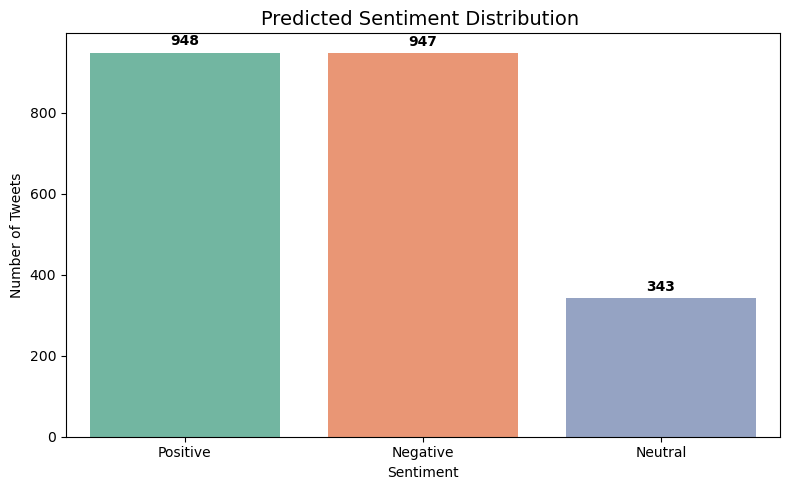

In [164]:
sentiment_counts = fifa_df["Predicted_Sentiment"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.title("Predicted Sentiment Distribution ", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
for i, value in enumerate(sentiment_counts.values) :
    plt.text(i, value + 10, str(value), ha = 'center', va = 'bottom', fontweight = 'bold')
plt.tight_layout()
plt.savefig("bar chart.png")
plt.show()

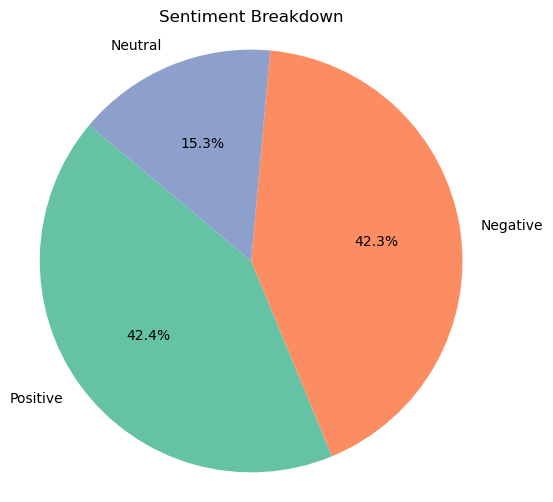

In [166]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Sentiment Breakdown")
plt.axis('equal') 
plt.savefig("pie chart.png")
plt.show()

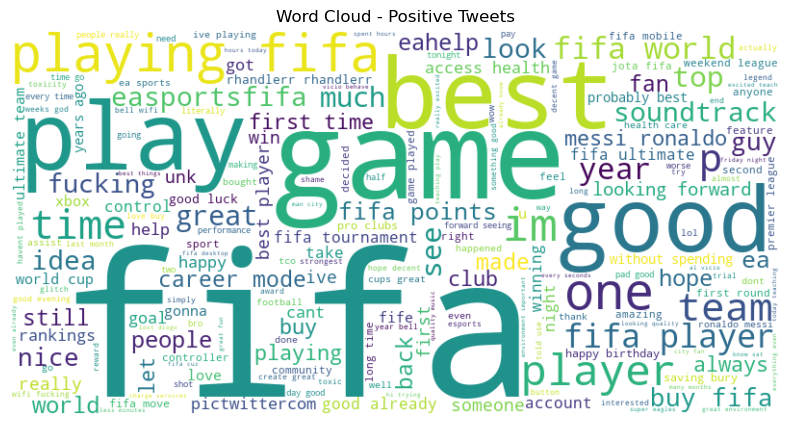

In [168]:
positive_text = " ".join(fifa_df[fifa_df["Predicted_Sentiment"] == "Positive"]["Filtered_Text"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Tweets")
plt.savefig("positve word cloud.png")
plt.show()

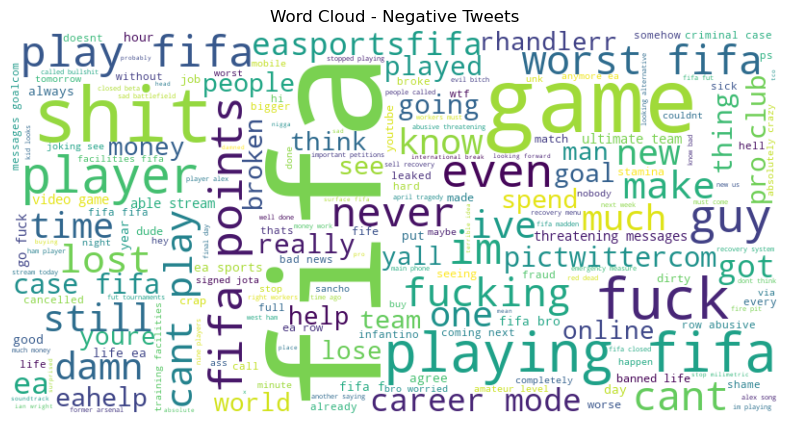

In [170]:
negative_text = " ".join(fifa_df[fifa_df["Predicted_Sentiment"] == "Negative"]["Filtered_Text"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Tweets")
plt.savefig("negative word cloud.png")
plt.show()

## Export Cleaned Dataset

saved the processed tweets with sentiment scores into a CSV file.

In [126]:
fifa_df.to_csv("Fifa Data.csv" , index = False)